# Análise exploratória dos dados em Python

Além dos dados recuperados nas tarefas anteriores, você recebeu um segundo arquivo. Agora você tem estes dois CSVs:

- `/datasets/project_sql_result_01.csv`: contém os seguintes dados:
  - `trips_amount`: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.

- `/datasets/project_sql_result_04.csv`: contém os seguintes dados:
  - `dropoff_location_name`: bairros de Chicago onde as corridas terminaram
  - `average_trips`: o número médio de viagens que terminaram em cada bairro em novembro de 2017.

Para esses dois conjuntos de dados, agora você precisa:
- importar os arquivos
- estudar os dados que eles contêm
- verificar se os tipos de dados estão corretos
- identificar os 10 principais bairros em termos de destinos
- fazer gráficos: empresas de táxi e número de corridas, top 10 bairros por número de corridas em que esse bairro é destino
- tirar conclusões com base em cada gráfico e explicar os resultados

# Importando bibliotecas e arquivos

In [2]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns

## Importando datasets e os visualizando

In [4]:
trips_num = pd.read_csv('datasets/project_sql_result_01.csv')
trips_neig = pd.read_csv('datasets/project_sql_result_04.csv')

In [5]:
trips_num.info()
trips_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
trips_neig.info()
trips_neig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Os tipos de dados estão corretos e não há nulos

## Identificando os 10 principais bairros em termos de destino

A princípio o df já estaria ordenado corretamente do maior para o menor, mas para garantir será feita a ordenação novamente.

In [12]:
top_10_neig = trips_neig.sort_values(by='average_trips', ascending=False).head(10)
top_10_neig

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


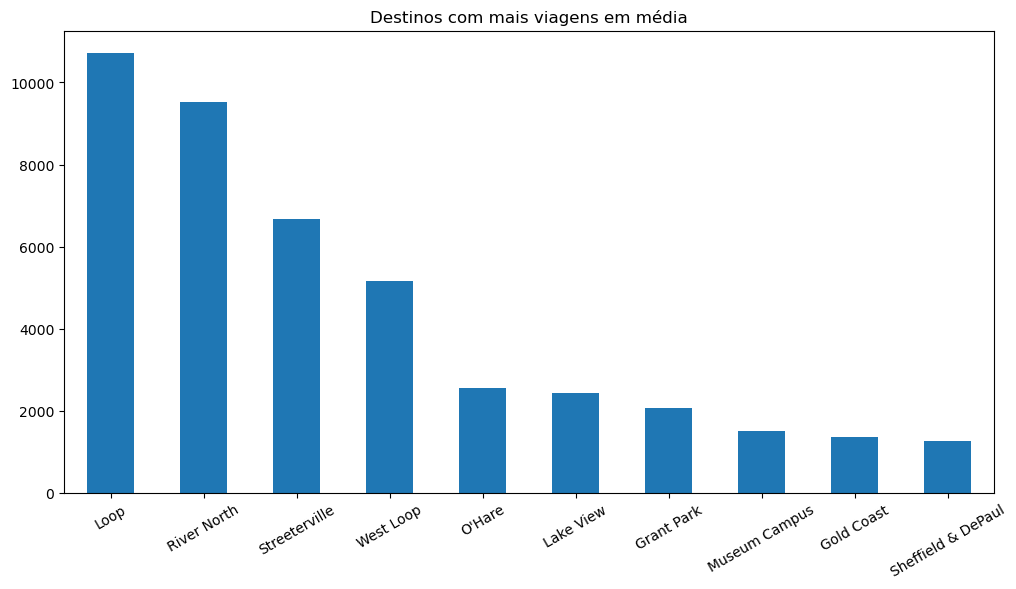

In [28]:
top_10_neig.plot(x='dropoff_location_name', y='average_trips', kind='bar', title='Destinos com mais viagens em média', figsize=(12, 6), rot=30, legend=False)

plt.xlabel('')

plt.show()

É visto que a maioria das viagens são para o litoral principal de Chicago, enquanto o aeroporto fica em 5º lugar no ranking.

## Identificando as principais empresas de taxi

In [29]:
top_15_company = trips_num.sort_values(by='trips_amount', ascending=False).head(15)
top_15_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


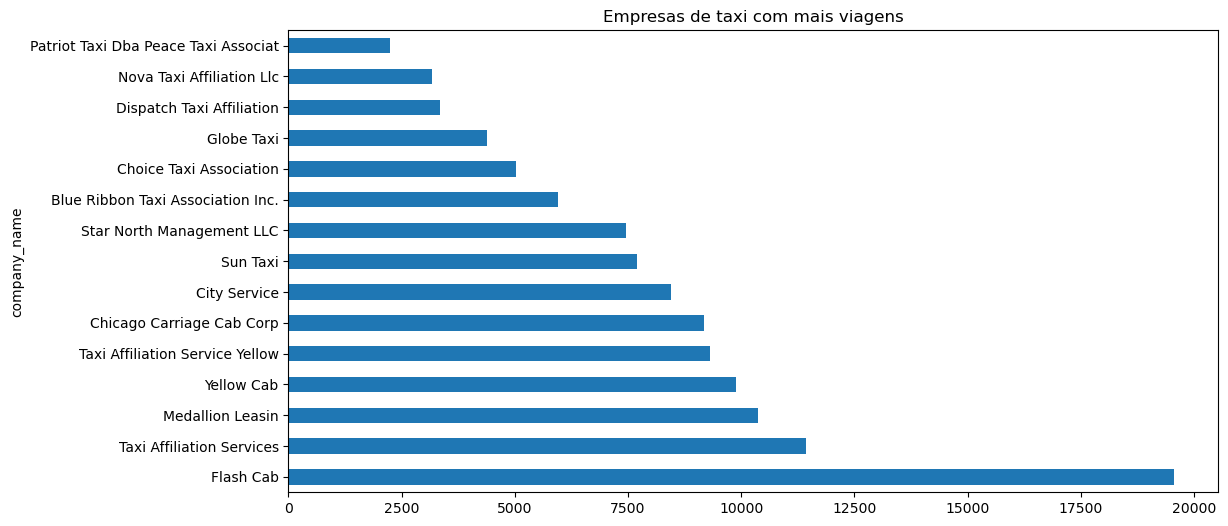

In [30]:
top_15_company.plot(x='company_name', y='trips_amount', kind='barh', title='Empresas de taxi com mais viagens', figsize=(12, 6), legend=False)

plt.xlabel('')

plt.show()

É provável que a empresa Flash Cab ou tenha uma frota maior, ou posicione sua frota de forma a encontrar mais passageiros destinados ao litoral principal de Chicago, onde estão os destinos mais movimentados.

# Testando hipóteses

## Importando dataset com dados do clima durante viagens do Loop para o aeroporto O'Hare

In [31]:
trip_weather = pd.read_csv('datasets/project_sql_result_07.csv')

In [32]:
trip_weather.info()
trip_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


## Hipóteses

### A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos?

Hipótese nula: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos

Hipótese alternativa: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

alpha = 0.05

In [33]:
alpha = 0.05

good = trip_weather[trip_weather['weather_conditions'] == 'Good']['duration_seconds']
bad = trip_weather[trip_weather['weather_conditions'] == 'Bad']['duration_seconds']

results = st.ttest_ind(good, bad, equal_var=True)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

Valor-p: 6.517970327099473e-12
Rejeitamos a hipótese nula


# Conclusão

Como desejávamos saber se a chuva afeta a duração das viagens, bastou separar o dataframe em 2 variantes: tempo bom e tempo ruim. Então foi testada a semelhança entre as durações dessas duas variantes. Como o valor p é infinitamente pequeno, sabemos que há sim uma grande diferença nas durações das viagens para sábados chuvosos em comparação com sábados com tempo bom.